In [170]:
from bs4 import BeautifulSoup # Python library for pulling data out of HTML and XML files
import requests  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [172]:
url = 'https://en.wikipedia.org/wiki/Emission_intensity' # resource address 
page = requests.get(url) # Send a GET request to the specified URL
soup = BeautifulSoup(page.text, 'html') # Initializing variable

In [173]:
soup.find_all('table') # parsing HTML and XML documents 

[<table class="wikitable sortable">
 <caption>Lifecycle greenhouse gas emissions by electricity source<sup class="reference" id="cite_ref-IPCC_Annex_II_6-1"><a href="#cite_note-IPCC_Annex_II-6"><span class="cite-bracket">[</span>6<span class="cite-bracket">]</span></a></sup>
 </caption>
 <tbody><tr>
 <th>Technology</th>
 <th>Description</th>
 <th>50th percentile <br/> (g CO<sub style="font-size: 80%;vertical-align: -0.35em">2</sub>-eq/kWh<sub>e</sub>)
 </th></tr>
 <tr>
 <td><a href="/wiki/Hydroelectricity" title="Hydroelectricity">Hydroelectric</a></td>
 <td>reservoir</td>
 <td>4
 </td></tr>
 <tr>
 <td><a href="/wiki/Wind" title="Wind">Wind</a></td>
 <td><a href="/wiki/List_of_onshore_wind_farms" title="List of onshore wind farms">onshore</a></td>
 <td>12
 </td></tr>
 <tr>
 <td><a href="/wiki/Nuclear_power" title="Nuclear power">Nuclear</a></td>
 <td>various <a href="/wiki/Generation_II_reactor" title="Generation II reactor">generation II reactor</a> types</td>
 <td>16
 </td></tr>
 <tr

In [174]:
my_table = soup.find_all('table')[0]

In [175]:
my_table.find_all('th')

[<th>Technology</th>,
 <th>Description</th>,
 <th>50th percentile <br/> (g CO<sub style="font-size: 80%;vertical-align: -0.35em">2</sub>-eq/kWh<sub>e</sub>)
 </th>]

In [176]:
my_table2 = my_table.find_all('th')

In [177]:
my_table3 = [titles.text.strip() for titles in my_table2]

In [178]:
print(my_table3)

['Technology', 'Description', '50th percentile  (g CO2-eq/kWhe)']


In [179]:
df = pd.DataFrame(columns = my_table3)

In [180]:
df

,Technology,Description,50th percentile (g CO2-eq/kWhe)


In [181]:
column_data = my_table.find_all('tr')

In [182]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    indie = [data.text.strip() for data in row_data]
    #print(indie)

    length = len(df)
    df.loc[length] = indie
    

In [183]:
df

,Technology,Description,50th percentile (g CO2-eq/kWhe)
0,Hydroelectric,reservoir,4
1,Wind,onshore,12
2,Nuclear,various generation II reactor types,16
3,Biomass,various,230
4,Solar thermal,parabolic trough,22
5,Geothermal,hot dry rock,45
6,Solar PV,Polycrystalline silicon,46
7,Natural gas,various combined cycle turbines without scrubbing,469
8,Coal,various generator types without scrubbing,1001


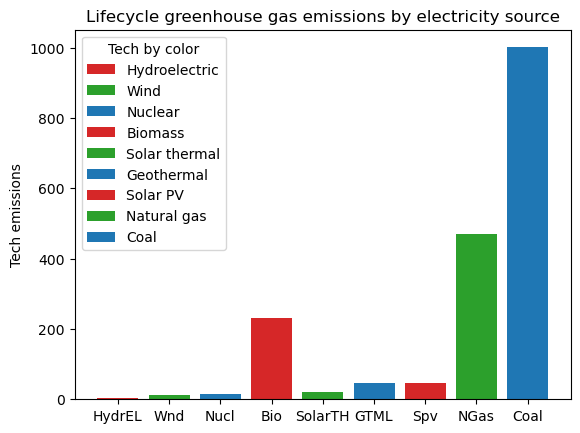

In [264]:
# Bar graph color
fig, ax = plt.subplots()

Technology = ['HydrEL', 'Wnd', 'Nucl', 'Bio', 'SolarTH', 'GTML', 'Spv', 'NGas', 'Coal'] # worbs abbriviated to fit the bar graph
counts = [4, 12, 16, 230, 22, 45, 46, 469, 1001]
bar_labels = ['Hydroelectric', 'Wind', 'Nuclear', 'Biomass', 'Solar thermal', 'Geothermal', 'Solar PV', 'Natural gas', 'Coal']
bar_colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:red', 'tab:green', 'tab:blue', 'tab:red', 'tab:green', 'tab:blue']

ax.bar(Technology, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Tech emissions')
ax.set_title('Lifecycle greenhouse gas emissions by electricity source')
ax.legend(title = 'Tech by color')

plt.show()

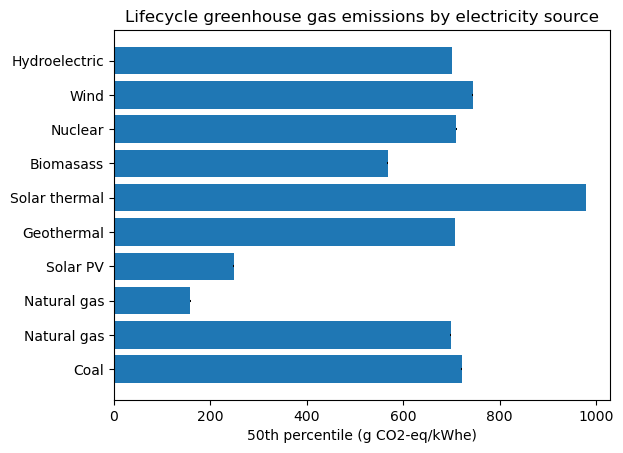

In [260]:
# Horizontal bar chart

np. random.seed(19680801)

fig, ax = plt.subplots()# Fixing state for reproducibility

Tech = ('Hydroelectric', 'Wind', 'Nuclear', 'Biomasass', 'Solar thermal', 'Geothermal', 'Solar PV', 'Natural gas', 'Natural gas', 'Coal')
y_pos = np.arange(len(Tech))
performanace = 1001 * np.random.rand(len(Tech))
error = np.random.rand(len(Tech))

ax.barh(y_pos, performanace, xerr = error, align = 'center')
ax.set_yticks(y_pos, labels = Tech)
ax.invert_yaxis()
ax.set_xlabel('50th percentile (g CO2-eq/kWhe)')
ax.set_title('Lifecycle greenhouse gas emissions by electricity source')

plt.show()